# Movie Trends Analysis

## V. Data Modeling and Evalution 
 
#### by Nadir Sarigul 

### Understanding the movie market

#### [1) What movie genres are mostly produced?](#1)

#### [2) Which genres have the highest production costs?](#2)

#### [3) Which genres have the highest profit?](#3)

#### [4) Does production costs correlate to profit?](#4)

#### [5) What is the profit margin in each genre?](#5)

#### [ 6) How does the profit margin correlate with the production costs?](#6)

### [Understanding movie trends](#a)

#### [1) What are the genres with best ratings?](#b)

#### [2) Is there a correlation between ratings and profit margins?](#c)

#### [3) What is the best time of the year to release a movie?](#d)

##  [Conclusions](#e)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("basic_data.csv")
#df["release_date"] = pd.to_datatime(df(df["release_date"]))
df['release_date'] = pd.to_datetime(df['release_date'], utc=False)
#df.set_index("release_date", inplace =True)



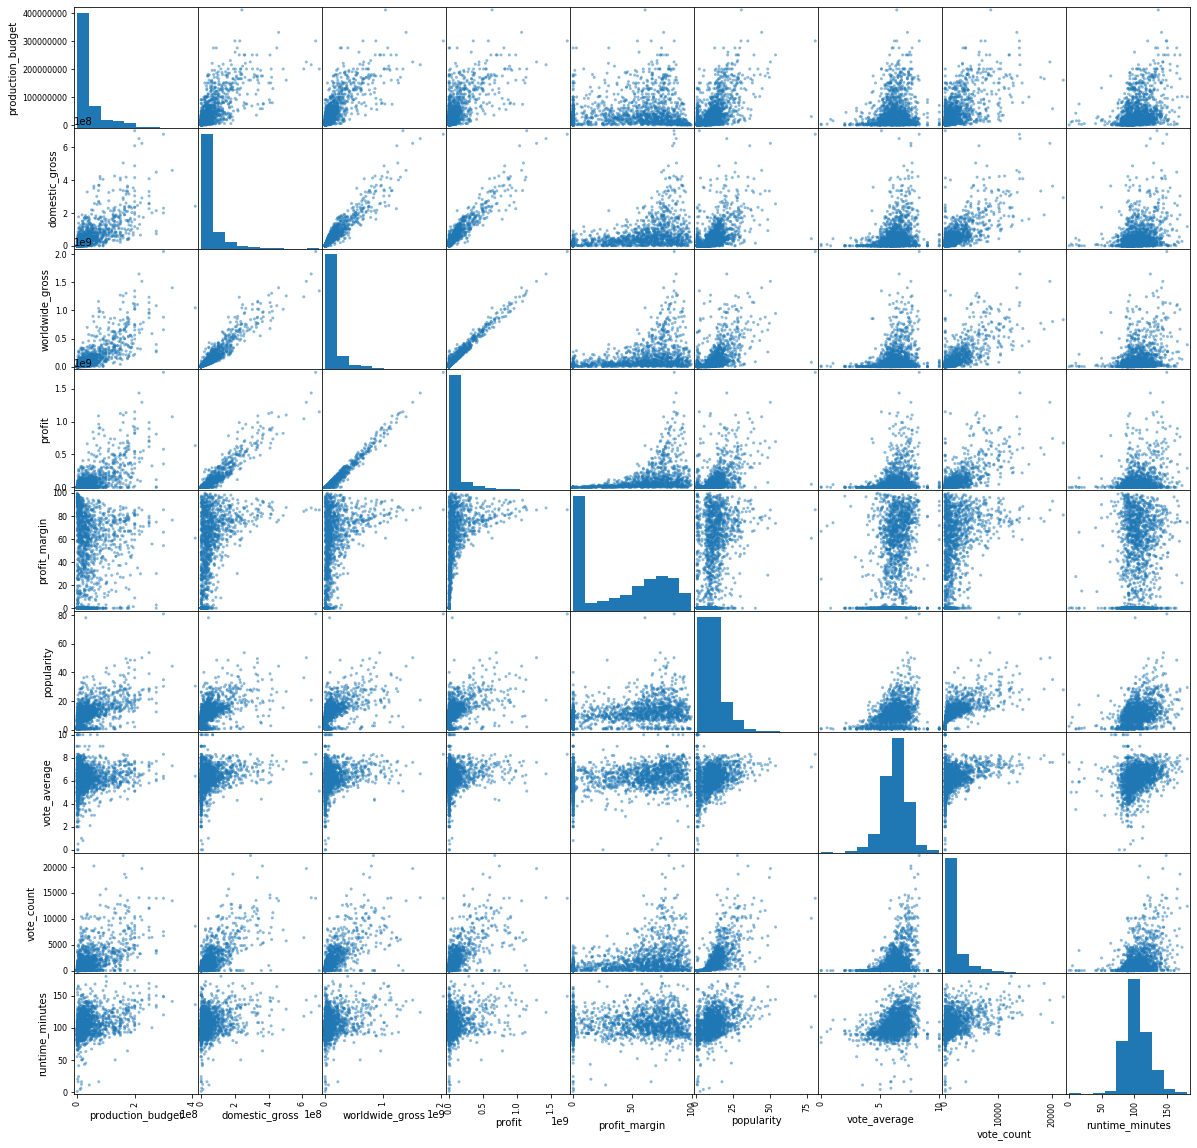

In [3]:
pd.plotting.scatter_matrix(df, figsize=(20, 20));

In [4]:
# creating column year, monhts and getting movie after 2010 
df["Year"] = df["release_date"].dt.year
df["months"] = df["release_date"].dt.month
df = df[df["Year"]>2010]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1533 entries, 0 to 1753
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie              1533 non-null   object        
 1   production_budget  1533 non-null   int64         
 2   domestic_gross     1533 non-null   int64         
 3   worldwide_gross    1533 non-null   int64         
 4   profit             1533 non-null   int64         
 5   profit_margin      1533 non-null   float64       
 6   popularity         1533 non-null   float64       
 7   release_date       1533 non-null   datetime64[ns]
 8   vote_average       1533 non-null   float64       
 9   vote_count         1533 non-null   int64         
 10  runtime_minutes    1533 non-null   float64       
 11  genres             1533 non-null   object        
 12  Year               1533 non-null   int64         
 13  months             1533 non-null   int64         
dtypes: datet

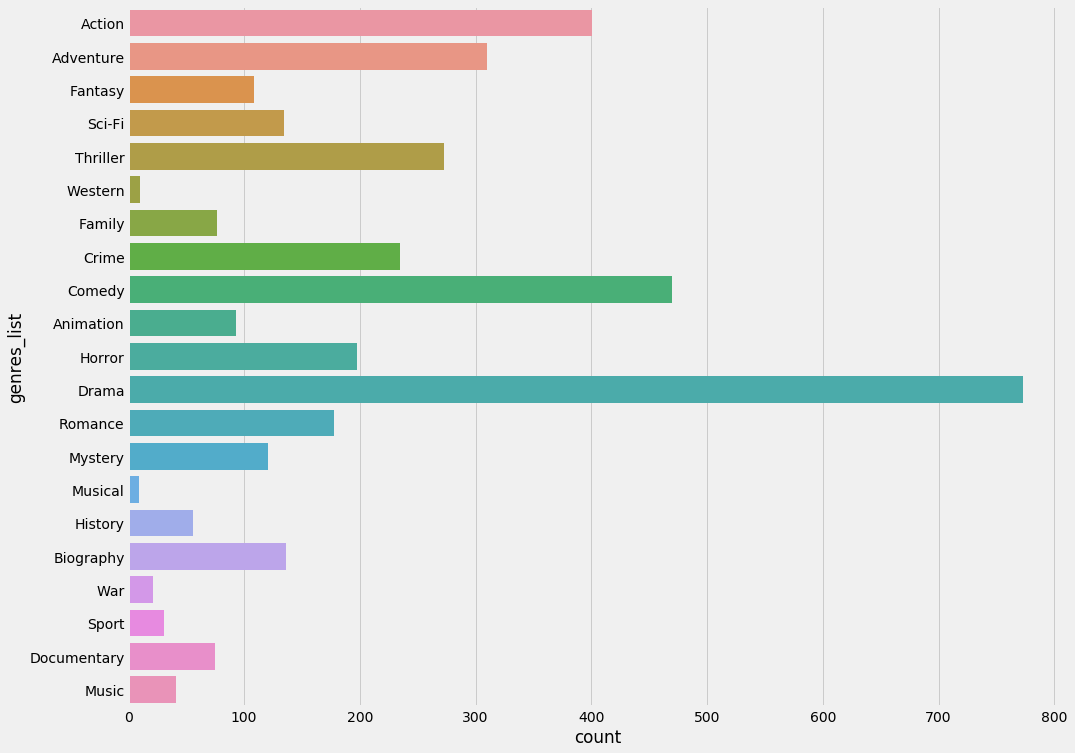

In [5]:
df1 = df.copy()
plt.style.use('fivethirtyeight')
#Split genre column values into a list where each value is a list item
df1["genres_list"] = df1["genres"].map(lambda x: x.split(","))

#Transform each element of a list-like to a row use explode method
df1 = df1.explode("genres_list")

#Create a figure and a set of subplots.
fig, ax = plt.subplots(figsize =(15, 12))

#Show the counts of observations in each categorical bin using bars.
sns.countplot(data=df1, y='genres_list' ,ax =ax);

##  <a id ="1"> What movie genres are mostly produced?</a>

This analysis demonstrates that the genre with most movies produced is Drama produced followed by Comedy  and Action, while the least produced movie genres are Music, Westerns and War movies. It is important to note that the different in number of Drama movies to the second largest genre (Comedy) is substantial with Drama movies being produced 39.2% more than Comedy movies. 

In [6]:
#counting each value in genres
genres_count = df1["genres_list"].value_counts()
mostproduce = genres_count[:10]

#with for loop get name of count for element
for i, index in mostproduce.items():
    print(f" {i} is the most produced genres {index}")

 Drama is the most produced genres 773
 Comedy is the most produced genres 470
 Action is the most produced genres 401
 Adventure is the most produced genres 310
 Thriller is the most produced genres 273
 Crime is the most produced genres 235
 Horror is the most produced genres 198
 Romance is the most produced genres 178
 Biography is the most produced genres 136
 Sci-Fi is the most produced genres 135


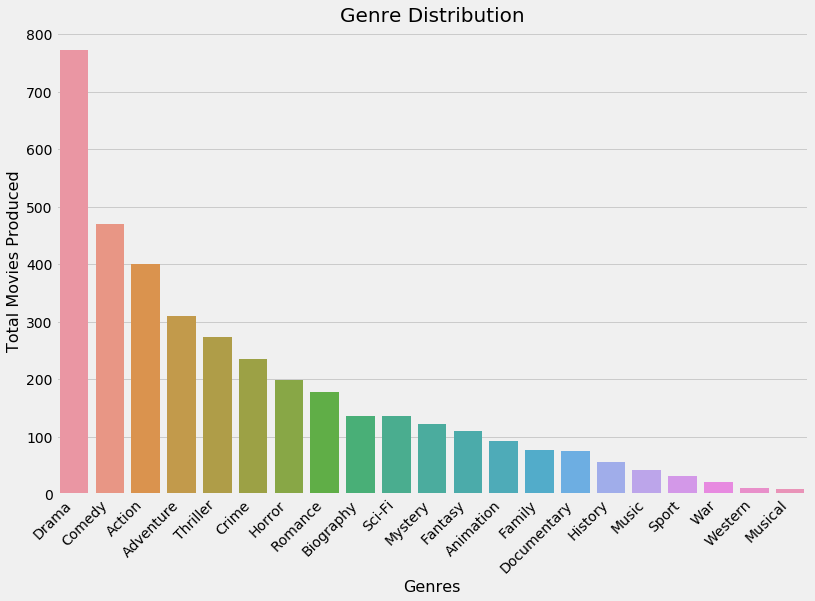

In [7]:


#give size to graph
plt.style.use('fivethirtyeight')
#plt.style.use('dark_background')
#give size to graph
#plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(genres_count.index, genres_count.values, ax=ax);
ax.set_xticklabels(genres_count.index, rotation= 45, ha = "right")
#ax.set_ylim()
plt.xlabel("Genres", fontsize=16, c="black")
plt.ylabel("Total Movies Produced", fontsize=16, c="black")
plt.title("Genre Distribution", fontsize = 20, c="black");
#fig.savefig("genre_distribution.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight")


## <a id ="2"> Which genres have the highest production costs?</a>




Analysis of the money spent to produce movies by genre reveled that Adventure and Animation (which are two of the most produced movie genres) as well as Fantasy are the most expensive to produce while Documentary, Horror and Music are the cheapest genres to produce. It is interesting to note that Drama, which is the most produced genre, has an average production cost of about 25% of the production costs of Adventure and Animation movies.


In [8]:
# for  profit is budgets["worldwide_gross"] - budgets["production_budget"]
# for margin profit is (budgets["total"]/(budgets["worldwide_gross"]))*100

budget_by_genre = df1[df1["profit_margin"]>=0]
genre_production = budget_by_genre.groupby(budget_by_genre["genres_list"])

# production_budget mean
production_mean = genre_production["production_budget"].mean()
production_mean.sort_values(ascending = False, inplace = True)
# turn million
production_mean = production_mean/ 1000000
#production_mean


In [9]:
top10 =production_mean[:10].round(2)
index =0
for genre, budget in top10.items():
    index += 1
    print(f"{index}. Highest  Average Budgets  {genre} is the  {budget}M $.")

1. Highest  Average Budgets  Adventure is the  100.82M $.
2. Highest  Average Budgets  Animation is the  90.68M $.
3. Highest  Average Budgets  Fantasy is the  82.54M $.
4. Highest  Average Budgets  Sci-Fi is the  80.5M $.
5. Highest  Average Budgets  Action is the  76.22M $.
6. Highest  Average Budgets  Western is the  61.95M $.
7. Highest  Average Budgets  Family is the  55.46M $.
8. Highest  Average Budgets  Musical is the  54.06M $.
9. Highest  Average Budgets  Comedy is the  36.1M $.
10. Highest  Average Budgets  Crime is the  30.23M $.


## Most money spend on Adventure ($100M), Animation, Fantasy)

Text(0.5, 1.0, 'Production Costs Distribution')

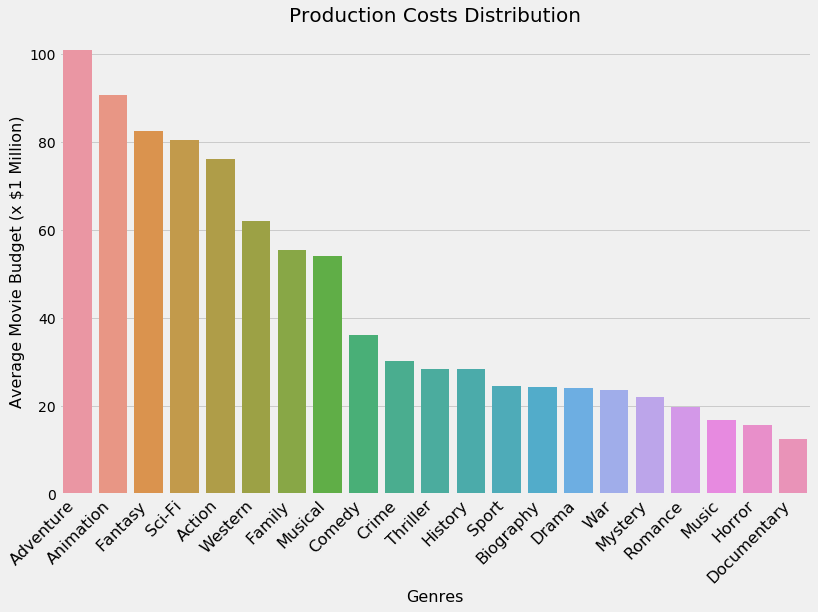

In [10]:

plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 8))

g = sns.barplot(production_mean.index, production_mean.values)
g.set_xticklabels(production_mean.index, rotation = 45, ha= "right",fontsize=16, c="black");
plt.xlabel("Genres", fontsize=16, c="black")
plt.ylabel("Average Movie Budget (x $1 Million)", fontsize=16, c="black")
plt.title("Production Costs Distribution", fontsize = 20, c="black")
#fig.savefig("budget_distribution.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight");

# Highest Average Profit

## <a id = "3"> Which genres have the highest profit?</a>


Looking at the profit that each movie genre generated it is clear that Animation, Adventure and Sci-Fi movie genres are the ones that generate more revenue. On the other hand the genres with lowest production costs such as Horror and Documentaries also have the lowest revenue. It is also interesting to point out that Drama movies while being the most produced type of movies and having a relatively low average production costs also has relatively low profit, suggesting that production costs may correlate with the profit potential for each genre.

In [11]:
# Total profit  is budgets["worldwide_gross"] - budgets["production_budget"] gross_profit


#budget_by_genre = df1[df1["profit_ratio"]>=0]
genre_profit = budget_by_genre.groupby(budget_by_genre["genres_list"])

# profit_budget mean
profit_mean = genre_profit["profit"].mean()
# sorted by profit
profit_mean.sort_values(ascending = False, inplace = True)
# turn million
profit_mean= profit_mean/ 1000000
#profit_mean



In [12]:
# get top 10 highest profit genres
top10 =profit_mean[:10].round(2)
index =0
for genre, profit in top10.items():
    index += 1
    print(f"{index}. Highest  average Profit  {genre}  is the  ${profit}M ")

1. Highest  average Profit  Animation  is the  $259.28M 
2. Highest  average Profit  Adventure  is the  $231.79M 
3. Highest  average Profit  Sci-Fi  is the  $215.28M 
4. Highest  average Profit  Musical  is the  $206.62M 
5. Highest  average Profit  Action  is the  $157.59M 
6. Highest  average Profit  Fantasy  is the  $146.12M 
7. Highest  average Profit  Family  is the  $104.41M 
8. Highest  average Profit  Comedy  is the  $88.19M 
9. Highest  average Profit  Thriller  is the  $68.64M 
10. Highest  average Profit  Music  is the  $60.98M 


## Most money earn on genres, Animation, Adventure , Sci-Fi, Musical are over $200 M)

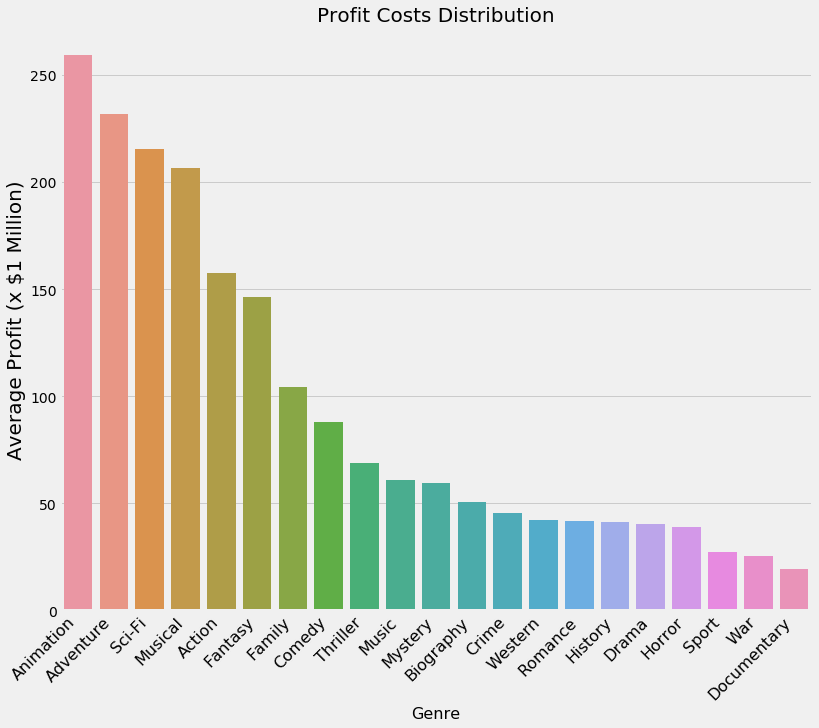

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 10))
g = sns.barplot(profit_mean.index, profit_mean.values)
g.set_xticklabels(profit_mean.index, rotation = 45, fontsize=16, ha= "right");
plt.ylabel("Average Profit (x $1 Million)", fontsize = 20)
plt.xlabel("Genre", fontsize=16)
plt.title("Profit Costs Distribution", fontsize =20);
#fig.savefig("profit_distribution.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight");

## <a id="4"> Does production costs correlate to profit?</a>


Correlative analysis of how production costs and profit relate to each other show a strong positive correlation (r=0.88) between the production costs and the profit generated in  each movie genre, suggesting that the more a movie studio spends on making a movie the more profit the movie makes. 


In [14]:
# correlation between profit and spend and earn ( earn_mean production_mean )
cor = profit_mean.corr(production_mean)
cor

0.8811273227380398

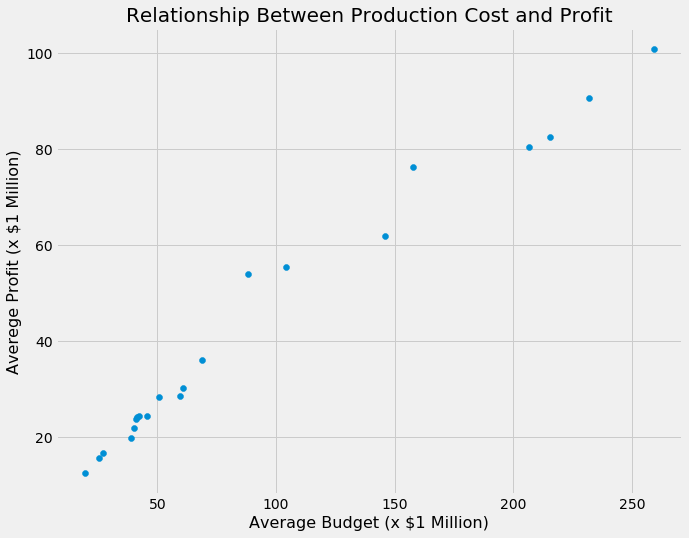

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 8))

plt.scatter(profit_mean, production_mean)
plt.title("Relationship Between Production Cost and Profit", fontsize= 20)
plt.xlabel("Average Budget (x $1 Million)", fontsize=16)
plt.ylabel("Averege Profit (x $1 Million)", fontsize=16);

#fig.savefig("corr_budget_Profit.png", transparent = False,facecolor= "white", dpi = 100, bbox_inches = "tight");

## <a id = "5" >What is the profit margin in each genre?]</a>

Using this metric, my analysis shows that Animation, Mystery and Adventure are the movie genres with the higest profit margin and War and Western genres the ones with the lowest profit margin. 



In [16]:

# profit margin (profit_ratio) is (budgets["total"]/(budgets["worldwide_gross"]+.0001))*100 % profit

#budget_by_genre = df1[df1["profit_ratio"]>=0]
genre_profit_margin = budget_by_genre.groupby(budget_by_genre["genres_list"])

# profit_budget mean
margin_mean = genre_profit_margin["profit_margin"].mean()
margin_mean.sort_values(ascending = False, inplace = True)

#margin_mean

In [17]:
top10 =margin_mean[:10].round(2)
index =0
for genre, margin in top10.items():
    index += 1
    print(f"{index}. Highest  average profit margin  {genre} is the  {margin}% ")

1. Highest  average profit margin  Animation is the  57.5% 
2. Highest  average profit margin  Mystery is the  49.97% 
3. Highest  average profit margin  Adventure is the  49.53% 
4. Highest  average profit margin  Sci-Fi is the  46.31% 
5. Highest  average profit margin  Comedy is the  45.78% 
6. Highest  average profit margin  Music is the  43.13% 
7. Highest  average profit margin  Fantasy is the  42.6% 
8. Highest  average profit margin  Action is the  41.98% 
9. Highest  average profit margin  Romance is the  41.4% 
10. Highest  average profit margin  Family is the  41.14% 


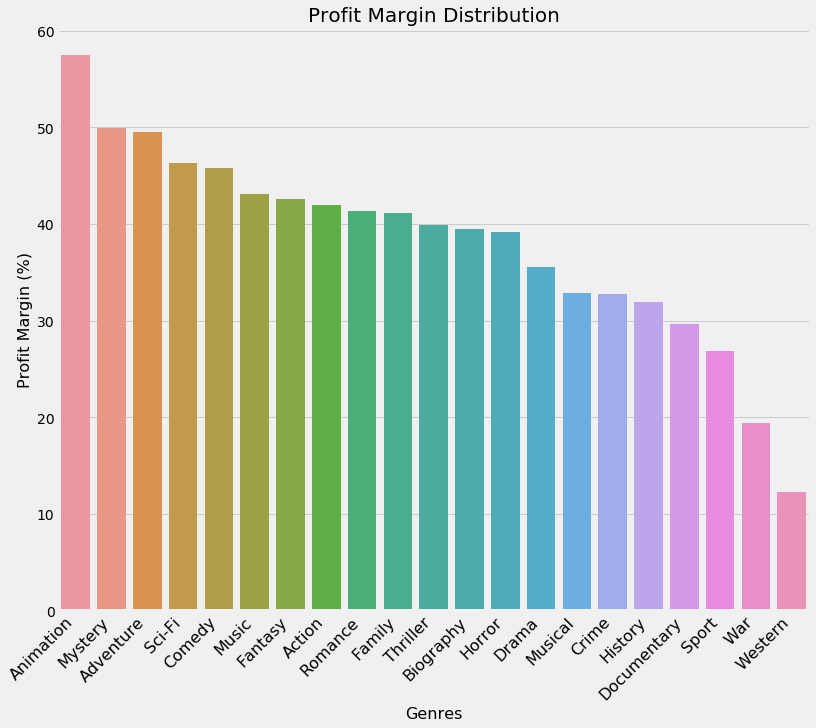

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 10))
g = sns.barplot(margin_mean.index, margin_mean.values)
g.set_xticklabels(margin_mean.index, rotation = 45, fontsize = 16, ha= "right");
plt.xlabel("Genres", fontsize=16)
plt.ylabel("Profit Margin (%)", fontsize=16)
plt.title("Profit Margin Distribution", fontsize = 20);

## <a id = "6"> How does the profit margin correlate with the production costs?</a>




Because profit margin is expressed as a percentage rather than a dollar amount, it is possible to compare the profitability of the movie genres independently of their production costs and therefore it is a more robust measure of finantial success of specific movie genres. Through this analysis we can see that unlike what happens with profit and production costs, there is no correlation between profit margin and production costs (r=0.36) indicating that there might be some other genres that do not have high productions costs or high dollar amounts in profit do have high profit margins. 



In [19]:
cor = margin_mean.corr(production_mean)
cor

0.36470337773772776

##  There's not a positive correlation between percentage, and Production
 ### which means more money you spend does not mean it earn more

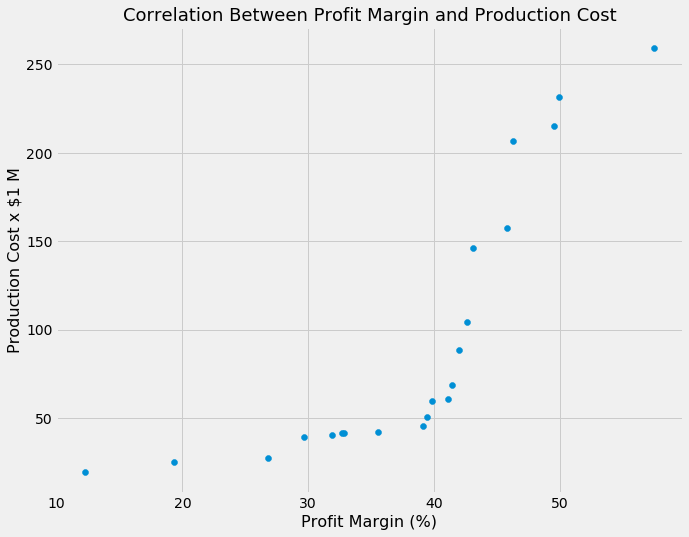

In [30]:
plt.figure(figsize = (10, 8))
plt.scatter(margin_mean, profit_mean)
plt.title("Correlation Between Profit Margin and Production Cost", fontsize = 18)
plt.ylabel("Production Cost x $1 M", fontsize=16)
plt.xlabel("Profit Margin (%)", fontsize=16);

## Comparison Between Profit, Profit Margin and Production Cost

To better understand these relationships, I directly compared the profit, profit margin and production costs for each genre. Thought this analysis is clear that some movie genres that I previously discarded because they did not have high dollar amount in return are very profitable, while others that have higher dollar amounts in profit are not as profitable investments. For instance movies in the music genre despite having a very low production costs (60.98M dollars) have a high profit margin returning decent profit on the investment (60.98M dollars profit)indicating that this genre might be a good business opportunity despite not returning the absolute highest dollar amounts. Moreover Biography movies also display a good profit margin (39.46%)while requiring low investment in production costs. On the other hand, this analysis shows that Western movies despite having a considerable production cost (61.95M dollars) have a very low profit margin (12.24%) and are likely to not be good investments for a new movie studio. 

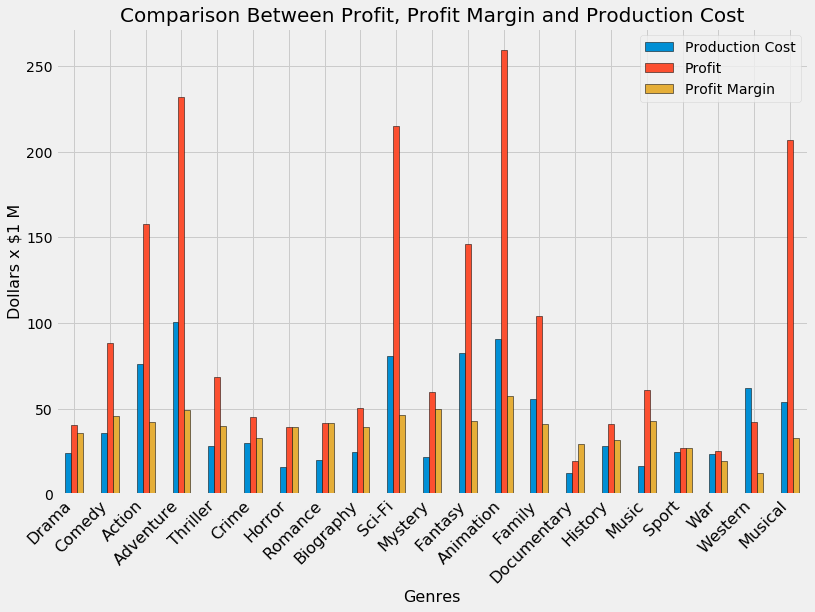

In [21]:

production_profit =df1.genres_list.value_counts()
production_profit.sort_values(ascending= False, inplace = True)

fig, ax = plt.subplots()

pd.DataFrame({"Production Cost": production_mean,"Profit": profit_mean,"Profit Margin": margin_mean},
                   index= production_profit.index).plot(kind= "bar", figsize= (12,8),edgecolor="k", fontsize =14, ax = ax )

ax.set_xticklabels(production_profit.index, rotation = 45, fontsize = 16, ha= "right");

plt.title("Comparison Between Profit, Profit Margin and Production Cost", fontsize = 20)
plt.ylabel("Dollars x $1 M", fontsize=16)
plt.xlabel("Genres", fontsize=16);

## <a id="a"> Understanding movie trends</a>

In addition to finantial considerations, how a movie is received by the audience also influences the general success of a movie producing studio as well as the general "brand" of the studio. To get some insights into what genre of movies are more well received by the audience I have performed some analysis aimed at determining what genres are better received, how their rating affects the profit margin and what time of the year is best to release a movie. 


## <a id = "b"> What are the genres with best ratings?</a>


A good metric of a movie's sucess is the ratings. Analysis of the average IMBD ratings revealed that the genres with the higest ratings are History, Biography and Music, while the movie genres with the lowest ratings are Mystery, Thriller and Horror. However, it is important to notice that this metric fails to account for the number of votes that yields the rating of the specific movie/genre which can convulute the interpretation of this metric.  Nevertheless this analysis further supports the conclusion that investing in genres such as Music and Biography is a profitable decision, where a significant return can be obtain from a more modest investment. 

In [22]:
rating_genres = df1
genres = rating_genres.groupby(rating_genres["genres_list"])

rating_mean = genres["vote_average"].mean()
rating_mean.sort_values(ascending = False, inplace = True)

In [23]:
rating_mean

genres_list
History        6.826786
Biography      6.725000
Music          6.668293
Musical        6.555556
Documentary    6.424000
Drama          6.401035
War            6.400000
Romance        6.371348
Western        6.360000
Sport          6.351613
Animation      6.338710
Family         6.285714
Adventure      6.272903
Comedy         6.181702
Sci-Fi         6.126667
Crime          6.102979
Fantasy        6.081651
Action         6.029426
Mystery        5.948760
Thriller       5.810989
Horror         5.455556
Name: vote_average, dtype: float64

In [24]:
top10 =rating_mean[:10].round(2)
index =0
for genre, rate in top10.items():
    index += 1
    print(f"{index}. Highest  rate genre  {genre} is rate {rate}")

1. Highest  rate genre  History is rate 6.83
2. Highest  rate genre  Biography is rate 6.73
3. Highest  rate genre  Music is rate 6.67
4. Highest  rate genre  Musical is rate 6.56
5. Highest  rate genre  Documentary is rate 6.42
6. Highest  rate genre  Drama is rate 6.4
7. Highest  rate genre  War is rate 6.4
8. Highest  rate genre  Romance is rate 6.37
9. Highest  rate genre  Western is rate 6.36
10. Highest  rate genre  Sport is rate 6.35


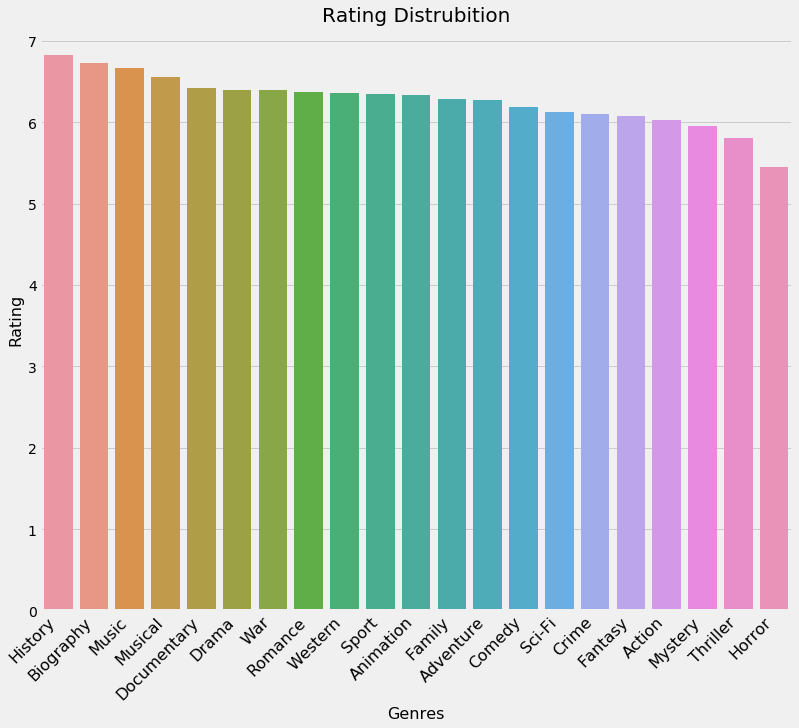

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 10))
g = sns.barplot(rating_mean.index, rating_mean.values)
g.set_xticklabels(rating_mean.index, rotation = 45, fontsize = 16, ha="right");
plt.xlabel("Genres", fontsize=16)
plt.ylabel("Rating", fontsize=16)
plt.title("Rating Distrubition", fontsize = 20);


## <a id ="c"> Is there a correlation between ratings and profit margins?</a>

No direct correlation between ratings and profit margins is observed (r=-0.246) suggesting that while ratings are important they do not substantially affect the financial success of a movie. 


In [26]:
correlation = margin_mean.corr(rating_mean)
correlation

-0.24593105271354315

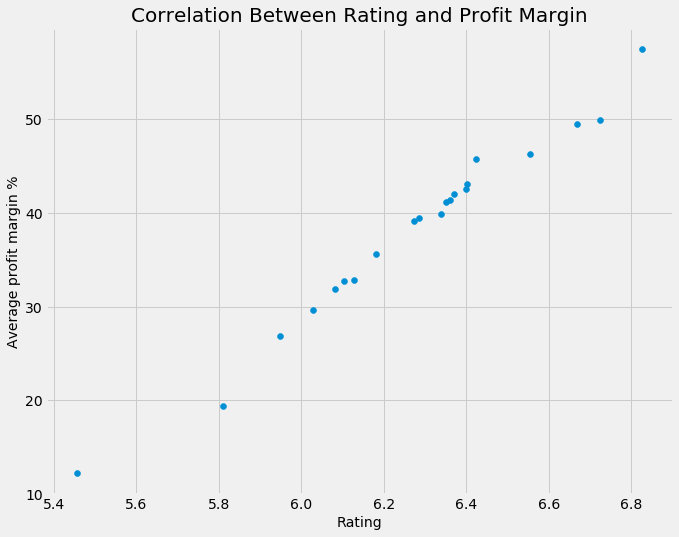

In [33]:
plt.figure(figsize = (10, 8))
plt.scatter(rating_mean, margin_mean)
plt.title("Correlation Between Rating and Profit Margin", fontsize = 20)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Average profit margin %", fontsize=14);

## <a id ="d"> What is the best time of the year to release a movie?</a>

By analysing the date of release of each movie in my dataframe over the last decade, it is clear that there are two peaks of movie release during the year: a first peak in February to April and a second more wider peak and with more movies released spanning from July to October. 




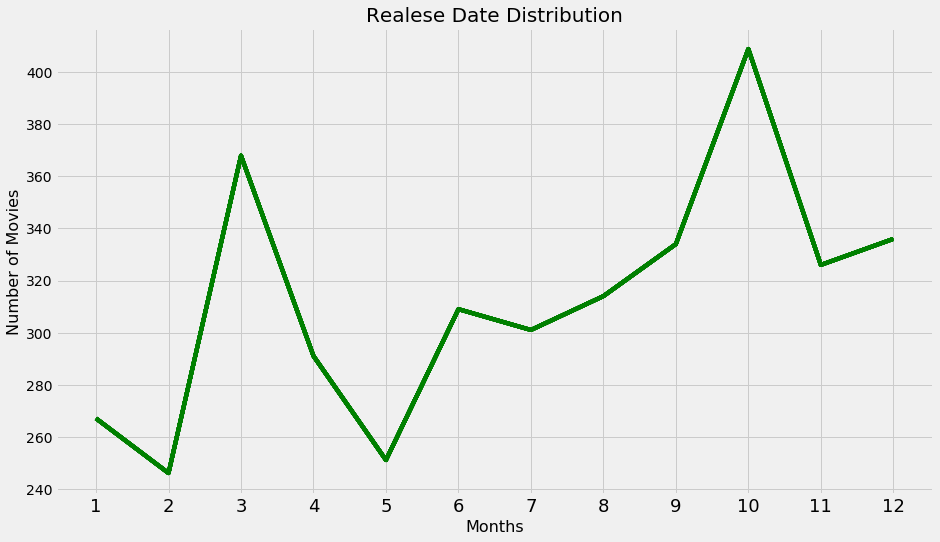

In [28]:
#plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
months = [month for month, df in  df1.groupby("months")]
fig,ax = plt.subplots(figsize = (14,8))
plt.plot(months, df1.groupby(["months"]).count(), "g")
plt.xticks(months, rotation = "horizontal", size =18)
plt.title("Realese Date Distribution", fontsize = 20);
plt.xlabel("Months", fontsize = 16)
plt.ylabel("Number of Movies", fontsize=16)
plt.show()

## <a id="e"> Conclusions</a>
Here I reviewed the movie trends from the past decade to make recomendations on what movie genres should Microsoft invest in to start their new movie studio. I focused on worldwide financial metrics as well as how the different movie genres were perceived by the worldwide audience to gain insights into the best movies to produce. Based on this analysis I can make the following recommendations:

* The production of few big Animation and Adventure movies: Animation and Adventure movies while having the higest production costs are also the ones that produce the highest profits. Therefore it is recommended to invest in these genre and produce a few big budget movies as they are likely to return good profits. Howeover an important consideration to take here is that these are big ticket items, and therefore are more risky investments. It is also important to notice that while the overall profit of these genres is high it is likely to be inflated by big blockbuster movies such as the Marvel and Pyrates of the Caribbean movies. This is a type of analysis that I did not cover in this project and that might be important when making the decision of producing big spending Adventure and Animation movies. Therefore some caution is warrented in the production of movies in these genres as they are to some extent high risk high reward.


* The production of Biography and Music movies: While their absolute profits are much lower than Animation and Adventure movies, these type of movies are popular and tend to have high profit margins. They represent safer investments as the production costs are generally low. These type of movies could also help build a brand for Microsoft to carve a niche in the studio business. 

        
* Movies produced should be released either in the beggining of the year or in the summer/fall as those seem to be the most active times of the year for movie releases. An important consideration to have here is which distribution peak is better for specific movie genres as this can provide additional clues on when to release specific movies. For instance the first peak of movie releases in February-April is likely linked to Valentine's day while movies released later in the year are better candidates for Award nominations. 

